# Resolución Tarea 1A
**Autores:** Taboada Agustin, Montenegro Luis, Mendoza Cristiany  Stauber Daniela

Este notebook está diseñado para ejecutar en Julia.


**1)** La ecuación diferencial

$$
\frac{dy}{dt} = \lambda y
$$

tiene como solución la función 
$$ y(t) = y_0e^{\lambda t}, $$
donde $y_0$ es una constante que depende del dato inicial, es el valor de $y(t)$ en $t=0$.

Buscamos una aproximación numérica utilizando el *método de Euler*,
$$y(t+\Delta t) \approx y(t) + \Delta t \dfrac{dy}{dt}(t) = y(t) + \Delta t \lambda y(t)$$
tomando $\lambda = 2$ y dato inicial $y(0) = 1$ en el intervalo de tiempo $[0,2]$.


**Implementación del método:**

Una forma simple de implementar el método de Euler sería la siguiente
```julia
#Datos iniciales
λ = 2
y0 = 1
#Cantidad de pasos temporales y dt
Tfin = 2.0
N = 201
dt = Tfin/(N-1)

#Vectores donde guardamos la solución
tiempos = zeros(N) # aca N es un array que contiene la grilla

y = zeros(N)
#Asignamos el dato inicial
y[1] = y0
#Evolución temporal usando el método de Euler
for i in 2:N
    tiempos[i] = dt*(i-1)      #Actualizamos el valor de t
    y[i] = y[i-1] + dt*λ*y[i-1]  #Hacemos un paso de Euler
end
```


Lo que haremos es partir este procedimiento en algunas funciones pequeñas, de manera que cuando en el futuro queramos cambiar de método numérico, o resolver otra ecuación diferencial, esto se pueda hacer de manera directa. Las funciones que usaremos están en el archivo ``myODEfunctions.jl``

In [1]:
include("myODEfunctions.jl")

myODEsolver (generic function with 1 method)

Nuestra implementación del método de Euler entonces será la siguiente: (esto será similar a la librería `DifferentialEquations.jl` que usaremos más adelante)

In [2]:
CrecimientoExponencial(y, t, λ) = λ*(y)  
y0 = 1.0 
T = (0.0, 4.0) 
λ = 2.
par = (λ) 
prob = myODEproblem(CrecimientoExponencial, y0, T, par) 

(CrecimientoExponencial, 1.0, (0.0, 4.0), 2.0)

Elegimos una cantidad de pasos temporales apropiados y resolvemos:

In [3]:
N = 101 
dt = (T[2]-T[1])/(N-1)
t, y = myODEsolver(prob, EulerStep, dt = dt)

([0.0, 0.04, 0.08, 0.12, 0.16, 0.2, 0.24, 0.28, 0.32, 0.36  …  3.64, 3.68, 3.72, 3.7600000000000002, 3.8000000000000003, 3.84, 3.88, 3.92, 3.96, 4.0], [1.0; 1.08; … ; 2036.8159780937817; 2199.761256341284;;])

Una vez obtenida la solución la graficamos.

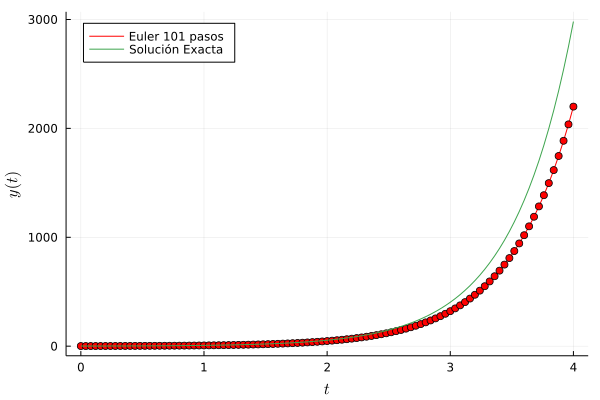

In [4]:
using Plots
gr()
plt = plot()
plot!(plt, t, y, color = :red, label = "Euler"*" "*string(N)*" "*"pasos")
scatter!(plt, t, y, color = :red, label = "")
plot!(plt, t, y0*exp.(λ*t), label = "Solución Exacta")
plot!(plt, ylabel = "y", color = :blue, zlabel = "z")
plot!(ylabel = "\$y(t)\$", xlabel = "\$t\$")
plot!(plt, legend = :topleft)

### Problema 1: ###

***1a)*** Juegue con distintos valores de `dt` (`N`) y datos iniciales. Vea que sucede a medida que aumenta o disminuye `dt`. 

In [5]:
#Utilizamos otro paso temporal mas pequeño
N1 = 301
dt1 = (T[2]-T[1])/(N1-1)
t1, y1 = myODEsolver(prob, EulerStep, dt = dt1)

([0.0, 0.013333333333333334, 0.02666666666666667, 0.04, 0.05333333333333334, 0.06666666666666667, 0.08, 0.09333333333333334, 0.10666666666666667, 0.12000000000000001  …  3.8800000000000003, 3.8933333333333335, 3.9066666666666667, 3.9200000000000004, 3.9333333333333336, 3.9466666666666668, 3.9600000000000004, 3.9733333333333336, 3.986666666666667, 4.0], [1.0; 1.0266666666666666; … ; 2614.6229713670173; 2684.346250603471;;])

In [6]:
# Y un paso temporal mas grande a ver como se comportaba el método 
N2 = 51
dt2 = (T[2]-T[1])/(N2-1)
t2, y2 = myODEsolver(prob, EulerStep, dt = dt2)

([0.0, 0.08, 0.16, 0.24, 0.32, 0.4, 0.48, 0.56, 0.64, 0.72  …  3.2800000000000002, 3.36, 3.44, 3.52, 3.6, 3.68, 3.7600000000000002, 3.84, 3.92, 4.0], [1.0; 1.16; … ; 1440.2618996580773; 1670.7038036033696;;])

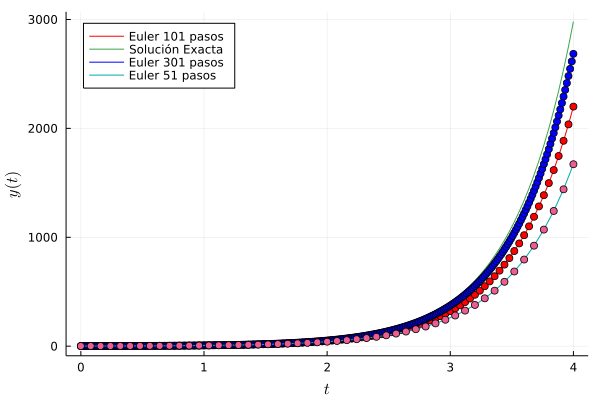

In [7]:
plot!(plt, t1, y1, color = :blue, label =  "Euler"*" "*string(N1)*" "*"pasos")
scatter!(plt, t1, y1, color = :blue, label = "")
plot!(plt, t2, y2,  label =  "Euler"*" "*string(N2)*" "*"pasos")
scatter!(plt, t2, y2,  label = "")

In [8]:
#Cambiamos los datos iniciales
y0 = 0.5
T = (0.0, 10.0)
λ = -1.
par = (λ)
prob = myODEproblem(CrecimientoExponencial, y0, T, par) 

(CrecimientoExponencial, 0.5, (0.0, 10.0), -1.0)

In [9]:
N = 101
dt = (T[2]-T[1])/(N-1)
t, y = myODEsolver(prob, EulerStep, dt = dt)
N1 = 301
dt1 = (T[2]-T[1])/(N1-1)
t1, y1 = myODEsolver(prob, EulerStep, dt = dt1)

([0.0, 0.03333333333333333, 0.06666666666666667, 0.1, 0.13333333333333333, 0.16666666666666666, 0.2, 0.23333333333333334, 0.26666666666666666, 0.3  …  9.7, 9.733333333333333, 9.766666666666666, 9.8, 9.833333333333334, 9.866666666666667, 9.9, 9.933333333333334, 9.966666666666667, 10.0], [0.5; 0.48333333333333334; … ; 1.9802326412428192e-5; 1.9142248865347252e-5;;])

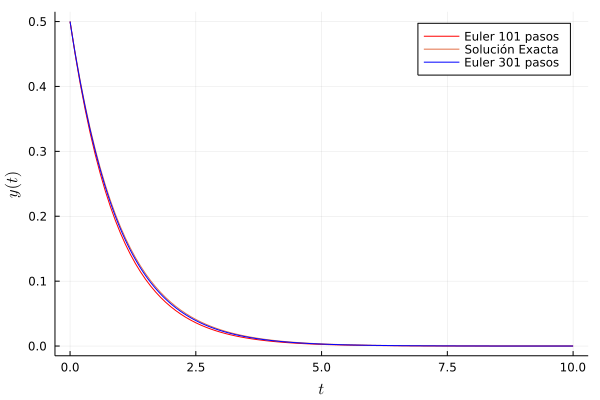

In [10]:
using Plots
gr()
plt = plot()
plot!(plt, t, y, color = :red, label =  "Euler"*" "*string(N)*" "*"pasos")
plot!(plt, t, y0*exp.(λ*t), label = "Solución Exacta")
plot!(plt, ylabel = "y", color = :blue, zlabel = "z")
plot!(ylabel = "\$y(t)\$", xlabel = "\$t\$")
plot!(plt, legend = :topright)
plot!(plt, t1, y1, color = :blue, label =  "Euler"*" "*string(N1)*" "*"pasos")

***1b)*** ¿Cómo se comporta el sistema si $\lambda$ y/o $y_0$ son números complejos?. Pruebe con $\lambda$ imaginario. Grafique. 

*Pista 1: Un número complejo $c = a + bi$ se define en jula como como `c = a + bim`. Las funciones `real(c)` e `imag(c)` retornan `a` y `b` respectivamente.*

*Pista 2: Si toma $\lambda$ complejo, también debe tomar el dato inicial como número complejo, aunque sea real, por ejemplo $y_0 = 1.0 + 0.0im$*

In [11]:
#Comenzamos con un dato inicial real y un λ imaginario puro
y0 = 1.0+0*im
T = (0.0, 10.0)
λ = 1*im
par = (λ)
prob = myODEproblem(CrecimientoExponencial, y0, T, par) 

(CrecimientoExponencial, 1.0 + 0.0im, (0.0, 10.0), 0 + 1im)

In [12]:
N = 101
dt = (T[2]-T[1])/(N-1)
t, y = myODEsolver(prob, RK4step, dt = dt)

([0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9  …  9.1, 9.200000000000001, 9.3, 9.4, 9.5, 9.600000000000001, 9.700000000000001, 9.8, 9.9, 10.0], ComplexF64[1.0 + 0.0im; 0.9950041666666667 + 0.09983333333333333im; … ; -0.8891943032370868 - 0.45752826995760026im; -0.8390754644130645 - 0.544013766248773im;;])

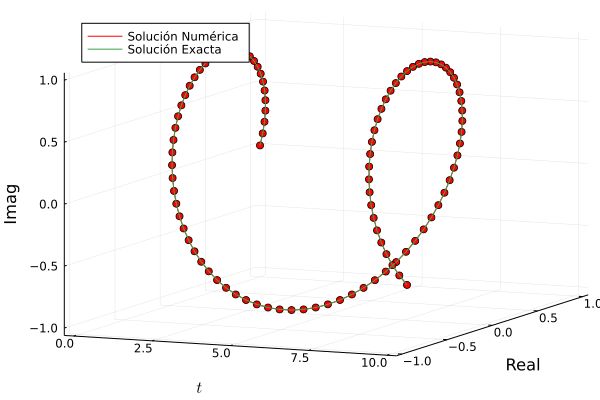

In [13]:
gr()
plt = plot()
plot!(plt, t, y, color = :red, label = "Solución Numérica")
scatter!(plt, t, y, color = :red, label = "")
plot!(plt, t, y0*exp.(λ*t), label = "Solución Exacta")
plot!(plt, ylabel = "y", color = :blue, zlabel = "Imag")
plot!(ylabel = "Real", xlabel = "\$t\$")
plot!(plt, legend = :topleft)

In [14]:
#Ahora daremos un dato inicial y un λ que se aparten un poco de los ejes
a=2.0
b=1.0

1.0

In [15]:
λ=a+b*im
y_0=y0-1.0*im

1.0 - 1.0im

In [16]:
CrecimientoExponencial(y, t, λ) = λ*(y)  
T = (0.0, 10.0)
par = (λ)
prob = myODEproblem(CrecimientoExponencial, y_0, T, par) 

(CrecimientoExponencial, 1.0 - 1.0im, (0.0, 10.0), 2.0 + 1.0im)

In [17]:
N = 101
dt = (T[2]-T[1])/(N-1)
t, y = myODEsolver(prob, EulerStep, dt = dt)

([0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9  …  9.1, 9.200000000000001, 9.3, 9.4, 9.5, 9.600000000000001, 9.700000000000001, 9.8, 9.9, 10.0], ComplexF64[1.0 - 1.0im; 1.3 - 1.1im; … ; 5.459767272843842e7 + 1.2617096375631414e8im; 5.290011089849469e7 + 1.568649237804208e8im;;])

In [18]:
N2 = 401
dt2 = (T[2]-T[1])/(N2-1)
t2, y2 = myODEsolver(prob, EulerStep, dt = dt2)

([0.0, 0.025, 0.05, 0.07500000000000001, 0.1, 0.125, 0.15000000000000002, 0.17500000000000002, 0.2, 0.225  …  9.775, 9.8, 9.825000000000001, 9.850000000000001, 9.875, 9.9, 9.925, 9.950000000000001, 9.975000000000001, 10.0], ComplexF64[1.0 - 1.0im; 1.075 - 1.025im; … ; -3.4141880756961566e8 + 2.9463114120856386e8im; -3.658555264783105e8 + 3.008272280797517e8im;;])

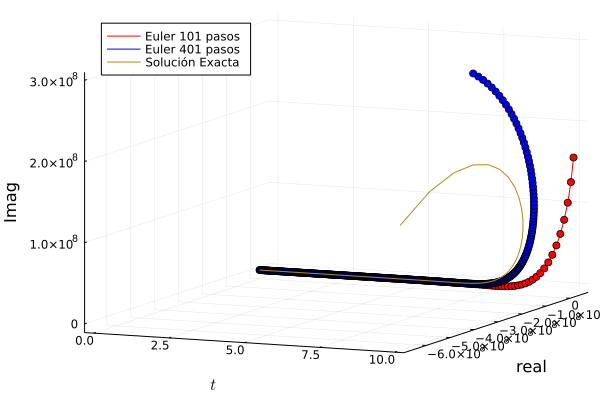

In [19]:
using Plots
gr()
plt = plot()
plot!(plt, t, y, color = :red, label =  "Euler"*" "*string(N)*" "*"pasos")
plot!(plt, t2, y2, color = :blue, label =  "Euler"*" "*string(N2)*" "*"pasos")
scatter!(plt, t, y, color = :red, label = "")
scatter!(plt, t2, y2, color = :blue, label = "")
plot!(plt, t, y_0*exp.(λ*t), label = "Solución Exacta")
plot!(ylabel = "real", xlabel = "\$t\$",zlabel= "Imag")
plot!(plt, legend = :topleft)

Con esto vemos que Euler cuando $\lambda$ es un num complejo, rápidamente se diferencia de la solución exacta.

***1c)*** Utilice varios N para calcular el factor $Q$ del método de Euler.

In [20]:
y0 =1.
T = (0.0, 4.0)
λ = 2.
par = (λ)
prob = myODEproblem(CrecimientoExponencial, y0, T, par) 

(CrecimientoExponencial, 1.0, (0.0, 4.0), 2.0)

In [21]:
N = 201
dt = (T[2]-T[1])/(N-1)
t , sol = myODEsolver(prob, EulerStep, dt = dt)
t2 , sol2 = myODEsolver(prob, EulerStep, dt = dt*0.5)
t4 ,sol4 = myODEsolver(prob, EulerStep, dt = dt*0.25)

([0.0, 0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045  …  3.955, 3.96, 3.9650000000000003, 3.97, 3.975, 3.98, 3.985, 3.99, 3.995, 4.0], [1.0; 1.01; … ; 2836.466458343795; 2864.8311229272326;;])

In [22]:
Q= sqrt.((sol[:,1]-sol2[1:2:end,1]) .* (sol[:,1]-sol2[1:2:end,1])) ./ sqrt.((sol2[1:2:end,1]-sol4[1:4:end,1]).*(sol2[1:2:end,1]-sol4[1:4:end,1])) 

201-element Vector{Float64}:
 NaN
   1.9606882015603555
   1.9601191131414146
   1.9595502077695852
   1.9589814853820744
   1.9584129459137776
   1.9578445893011946
   1.9572764154819837
   1.956708424392492
   1.956140615969589
   1.9555729901490968
   1.955005546868289
   1.9544382860635603
   ⋮
   1.856849117642473
   1.8563133505319604
   1.855777754926666
   1.8552423307672772
   1.8547070779945125
   1.8541719965491135
   1.8536370863718454
   1.853102347403468
   1.852567779584789
   1.8520333828566289
   1.8514991571598314
   1.850965102435247

In [23]:
#Aquí calculamos el factor de precision con la def
Q1= (sol[:,1]-sol2[1:2:end,1])  ./ (sol2[1:2:end,1]-sol4[1:4:end,1])

201-element Vector{Float64}:
 NaN
   1.9606882015603555
   1.9601191131414146
   1.9595502077695852
   1.9589814853820744
   1.9584129459137776
   1.9578445893011946
   1.9572764154819837
   1.956708424392492
   1.956140615969589
   1.9555729901490968
   1.955005546868289
   1.9544382860635603
   ⋮
   1.856849117642473
   1.8563133505319604
   1.855777754926666
   1.8552423307672772
   1.8547070779945125
   1.8541719965491135
   1.8536370863718454
   1.853102347403468
   1.852567779584789
   1.8520333828566289
   1.8514991571598314
   1.850965102435247

In [24]:
@macroexpand @. a+b

:((+).(a, b))

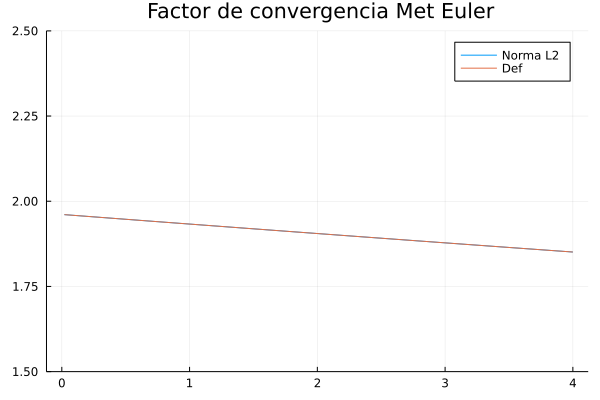

In [25]:
using Plots
plot(t,Q, ylim=(1.5,2.5), title =" Factor de convergencia Met Euler", label= "Norma L2")
plot!(t,Q1, label= "Def")

***1d)***
Usando $\lambda = 1, y_0 = 1$, implemente los métodos de Runge-Kutta de orden 2 y 4 creando dos funciones llamadas `RK2step` y `RK4step`, similares a `EulerStep`. Vuelva a graficar para distintos $N$ y calcule el factor $Q$ para estos métodos.

***Ayuda:** Primero defina las funciones en una celda y pruébelas hasta estar seguro que están funcionando correctamente. Sólo cuando esté seguro cópielas a el archivo  ``myODEfunctions.jl``. Es más eficiente y cómodo trabajar en el notebook!*

In [26]:
#Utilizando los datos iniciales que se propone 
y0 =1.
T = (0.0, 4.0)
λ = 1.
par = (λ)
prob = myODEproblem(CrecimientoExponencial, y0, T, par) 

(CrecimientoExponencial, 1.0, (0.0, 4.0), 1.0)

In [27]:
N = 401
dt = (T[2]-T[1])/(N-1)
t , sol = myODEsolver(prob, EulerStep, dt = dt)
t , solEI = myODEsolver(prob, EulerImproved, dt = dt)
t , solRK2 = myODEsolver(prob, RK2step, dt = dt)
t , solRK4 = myODEsolver(prob, RK4step, dt = dt)

([0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09  …  3.91, 3.92, 3.93, 3.94, 3.95, 3.96, 3.97, 3.98, 3.99, 4.0], [1.0; 1.0100501670833333; … ; 54.05488934550256; 54.59815001509595;;])

In [28]:
t2 , sol2 = myODEsolver(prob, EulerStep, dt = dt*0.5)
t4 ,sol4 = myODEsolver(prob, EulerStep, dt = dt*0.25)

t2 , solEI2 = myODEsolver(prob, EulerImproved, dt = dt*0.5)
t4 ,solEI4 = myODEsolver(prob, EulerImproved, dt = dt*0.25)

t2 , solRK22 = myODEsolver(prob, RK2step, dt = dt*0.5)
t4 ,solRK24 = myODEsolver(prob, RK2step, dt = dt*0.25)


t2 , solRK42 = myODEsolver(prob, RK4step, dt = dt*0.5)
t4 ,solRK44 = myODEsolver(prob, RK4step, dt = dt*0.25)

([0.0, 0.0025, 0.005, 0.0075, 0.01, 0.0125, 0.015, 0.0175, 0.02, 0.0225  …  3.9775, 3.98, 3.9825, 3.985, 3.9875000000000003, 3.99, 3.9925, 3.995, 3.9975, 4.0], [1.0; 1.0025031276057943; … ; 54.46182513511558; 54.59815003307323;;])

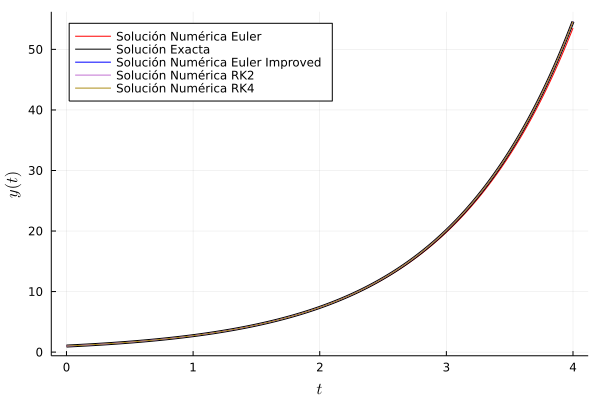

In [29]:
using Plots
gr()
plt = plot()
plot!(plt, t, sol, color = :red, label = "Solución Numérica Euler")
#scatter!(plt, t, sol, color = :red, label = "",markersize=3)
plot!(plt, t, y0*exp.(λ*t),color = :black, label = "Solución Exacta",lw = 3)
plot!(plt, ylabel = "y", color = :blue, zlabel = "z")
plot!(ylabel = "\$y(t)\$", xlabel = "\$t\$")
plot!(plt, legend = :topleft)
plot!(plt, t, solEI, color = :blue, label = "Solución Numérica Euler Improved",lw=1)
plot!(plt, t, solRK2, label = "Solución Numérica RK2")
plot!(plt, t, solRK4, label = "Solución Numérica RK4")


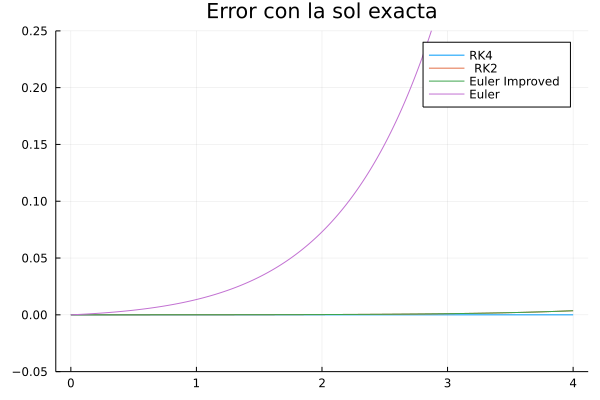

In [30]:
plot(t, y0*exp.(λ*t) -solRK4, label= "RK4", title="Error con la sol exacta", ylim= (-.05,0.25))
plot!(t,y0*exp.(λ*t) -solRK2,label= " RK2")
plot!(t,y0*exp.(λ*t) -solEI ,label= "Euler Improved")
plot!(t,y0*exp.(λ*t) -sol, label= "Euler")


In [31]:
#Calculamos los Q de la misma forma que antes
Q_Euler=sqrt.((sol[:,1]-sol2[1:2:end,1]) .*(sol[:,1]-sol2[1:2:end,1])) ./ sqrt.((sol2[1:2:end,1]-sol4[1:4:end,1]) .*(sol2[1:2:end,1]-sol4[1:4:end,1]))
Q_EulerIm=sqrt.((solEI[:,1]-solEI2[1:2:end,1]) .*(solEI[:,1]-solEI2[1:2:end,1]))./ sqrt.((solEI2[1:2:end,1]-solEI4[1:4:end,1]) .*(solEI2[1:2:end,1]-solEI4[1:4:end,1]))
Q_RK2=sqrt.((solRK2[:,1]-solRK22[1:2:end,1]) .*(solRK2[:,1]-solRK22[1:2:end,1]))./ sqrt.((solRK22[1:2:end,1]-solRK24[1:4:end,1]) .*(solRK22[1:2:end,1]-solRK24[1:4:end,1]))
Q_RK4=sqrt.((solRK4[:,1]-solRK42[1:2:end,1]) .*(solRK4[:,1]-solRK42[1:2:end,1]))./ sqrt.((solRK42[1:2:end,1]-solRK44[1:4:end,1]) .*(solRK42[1:2:end,1]-solRK44[1:4:end,1]))

401-element Vector{Float64}:
 NaN
  15.941176470588236
  15.921700223713646
  15.904129793510325
  15.923245614035087
  15.929626411815812
  15.930465949820789
  15.928832116788321
  15.927291886195995
  15.92489568845619
  15.930165289256198
  15.9289698772778
  15.928788390145122
   ⋮
  15.932452986725664
  15.932492300223029
  15.932398924255931
  15.932568393330078
  15.932670952659263
  15.932730670168173
  15.932656958021033
  15.932714160070361
  15.932696850940827
  15.932758289415897
  15.932585183378059
  15.932539602867067

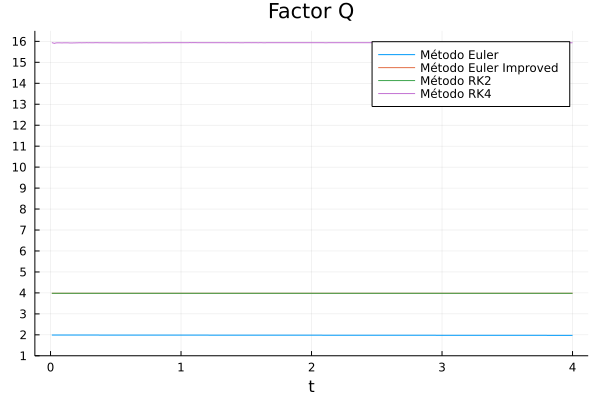

In [32]:
plot(t,Q_Euler, label="Método Euler", title ="Factor Q", ylim= (1,16.5),ticks = 0:1:16, xlabel = "t")
plot!(t,Q_EulerIm, label="Método Euler Improved")
plot!(t,Q_RK2, label="Método RK2")
plot!(t,Q_RK4, label="Método RK4")

***1e)*** Repita el punto anterior para $\lambda = i$ y $y_0 = 1$. ¿Qué diferencia ve entre los métodos? 

In [33]:
#Repetimos el punto anterior con los segundos datos iniciales del problema 1b
CrecimientoExponencial(y, t, λ) = λ*(y) 
λ=2. +1.0 *im
y0=1. +1.0 * im
par = (λ)
T = (0.0, 4.0)
prob = myODEproblem(CrecimientoExponencial, y0, T, par) 

(CrecimientoExponencial, 1.0 + 1.0im, (0.0, 4.0), 2.0 + 1.0im)

In [34]:
N = 201
dt = (T[2]-T[1])/(N-1)
t , sol = myODEsolver(prob, EulerStep, dt = dt)
t , solEI = myODEsolver(prob, EulerImproved, dt = dt)
t , solRK2 = myODEsolver(prob, RK2step, dt = dt)
t , solRK4 = myODEsolver(prob, RK4step, dt = dt)

([0.0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18  …  3.8200000000000003, 3.84, 3.86, 3.88, 3.9, 3.92, 3.94, 3.96, 3.98, 4.0], ComplexF64[1.0 + 1.0im; 1.0197877933333332 + 1.0614174466666666im; … ; 214.60760467543005 - 4044.722192494634im; 307.51142704877253 - 4204.481490589393im;;])

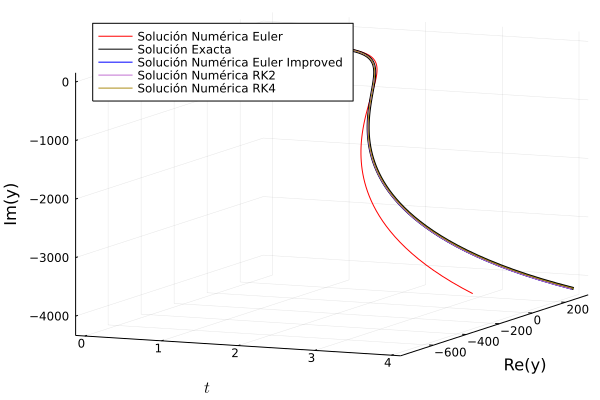

In [35]:
using Plots
gr()
plt = plot()
plot!(plt, t, sol, color = :red, label = "Solución Numérica Euler")
plot!(plt, t, y0*exp.(λ*t),color = :black, label = "Solución Exacta",lw = 3)
plot!(plt, ylabel = "y", color = :blue, zlabel = "z")
plot!(ylabel = "\$y(t)\$", xlabel = "\$t\$")
plot!(plt, legend = :topleft)
plot!(plt, t, solEI, color = :blue, label = "Solución Numérica Euler Improved",lw=1)
plot!(plt, t, solRK2, label = "Solución Numérica RK2")
plot!(plt, t, solRK4, label = "Solución Numérica RK4")

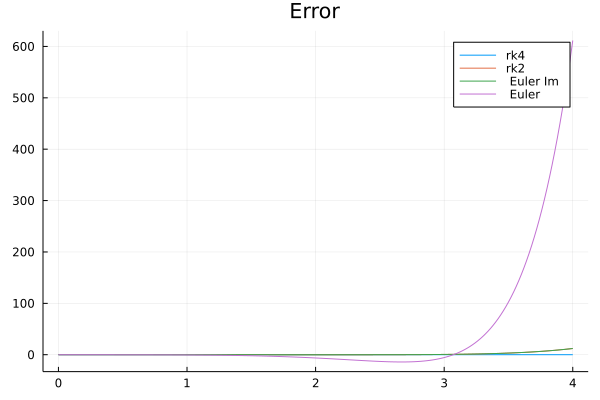

In [36]:
plot(t, real(y0*exp.(λ*t) -solRK4), label= " rk4", title= "Error")
plot!(t,real(y0*exp.(λ*t) -solRK2),label= " rk2")
plot!(t,real(y0*exp.(λ*t) -solEI ),label= "  Euler Im")
plot!(t,real(y0*exp.(λ*t) -sol), label= "  Euler")

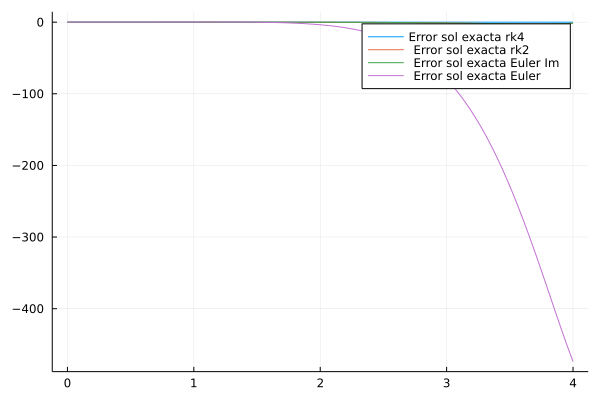

In [37]:
plot(t, imag(y0*exp.(λ*t) -solRK4), label= "Error sol exacta rk4")
plot!(t,imag(y0*exp.(λ*t) -solRK2),label= " Error sol exacta rk2")
plot!(t,imag(y0*exp.(λ*t) -solEI ),label= " Error sol exacta Euler Im")
plot!(t,imag(y0*exp.(λ*t) -sol), label= " Error sol exacta Euler")

In [38]:
t2 , sol2 = myODEsolver(prob, EulerStep, dt = dt*0.5)
t4 ,sol4 = myODEsolver(prob, EulerStep, dt = dt*0.25)

t2 , solEI2 = myODEsolver(prob, EulerImproved, dt = dt*0.5)
t4 ,solEI4 = myODEsolver(prob, EulerImproved, dt = dt*0.25)

t2 , solRK22 = myODEsolver(prob, RK2step, dt = dt*0.5)
t4 ,solRK24 = myODEsolver(prob, RK2step, dt = dt*0.25)


t2 , solRK42 = myODEsolver(prob, RK4step, dt = dt*0.5)
t4 ,solRK44 = myODEsolver(prob, RK4step, dt = dt*0.25)

([0.0, 0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045  …  3.955, 3.96, 3.9650000000000003, 3.97, 3.975, 3.98, 3.985, 3.99, 3.995, 4.0], ComplexF64[1.0 + 1.0im; 1.0049873116927084 + 1.0150877712760418im; … ; 283.6355235790295 - 4164.115560725724im; 307.5122673741162 - 4204.480618841087im;;])

In [39]:
#Aquí calculamos el Q teniendo en cuenta que estamos tratando con valores complejos
Q_Euler=sqrt.((sol[:,1]-sol2[1:2:end,1]) .* conj.(sol[:,1]-sol2[1:2:end,1])) ./ sqrt.((sol2[1:2:end,1]-sol4[1:4:end,1]) .* conj.(sol2[1:2:end,1]-sol4[1:4:end,1]))
Q_EulerIm=sqrt.((solEI[:,1]-solEI2[1:2:end,1]) .* conj.(solEI[:,1]-solEI2[1:2:end,1]))./ sqrt.((solEI2[1:2:end,1]-solEI4[1:4:end,1]) .* conj.(solEI2[1:2:end,1]-solEI4[1:4:end,1]))
Q_RK2=sqrt.((solRK2[:,1]-solRK22[1:2:end,1]) .* conj.(solRK2[:,1]-solRK22[1:2:end,1]))./ sqrt.((solRK22[1:2:end,1]-solRK24[1:4:end,1]) .* conj.(solRK22[1:2:end,1]-solRK24[1:4:end,1]))
Q_RK4=sqrt.((solRK4[:,1]-solRK42[1:2:end,1]) .* conj.(solRK4[:,1]-solRK42[1:2:end,1]))./ sqrt.((solRK42[1:2:end,1]-solRK44[1:4:end,1]) .* conj.(solRK42[1:2:end,1]-solRK44[1:4:end,1]))

201-element Vector{ComplexF64}:
                NaN + NaN*im
 15.726882590357013 + 0.0im
 15.726874295039671 + 0.0im
 15.726867564046191 + 0.0im
 15.726866434927587 + 0.0im
  15.72686298379129 + 0.0im
 15.726867789026537 + 0.0im
  15.72686370092949 + 0.0im
 15.726864566302092 + 0.0im
 15.726864016095606 + 0.0im
  15.72686382372469 + 0.0im
 15.726860994003772 + 0.0im
 15.726862479911542 + 0.0im
                    ⋮
 15.726863271020656 + 0.0im
 15.726863402919276 + 0.0im
 15.726863444493224 + 0.0im
  15.72686335991705 + 0.0im
 15.726863355168769 + 0.0im
  15.72686334724192 + 0.0im
 15.726863473141975 + 0.0im
  15.72686348694034 + 0.0im
 15.726863442131991 + 0.0im
 15.726863451082895 + 0.0im
 15.726863468224515 + 0.0im
 15.726863494266691 + 0.0im

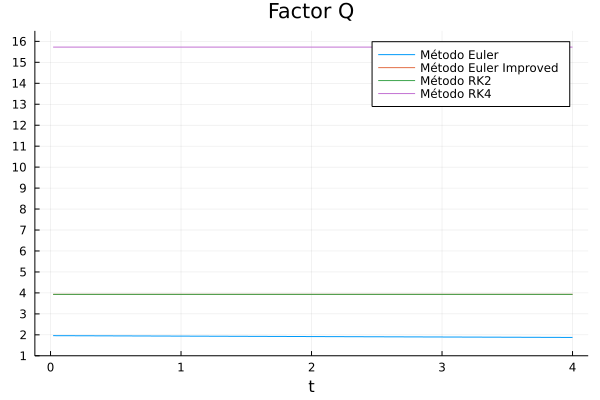

In [40]:
plot(t,real(Q_Euler), label="Método Euler", title ="Factor Q", ylim= (1,16.5),ticks = 0:1:16, xlabel = "t")
plot!(t,real(Q_EulerIm), label="Método Euler Improved")
plot!(t,real(Q_RK2), label="Método RK2")
plot!(t,real(Q_RK4), label="Método RK4")

### Problema 2: ###
**Estabilidad de la solución**

Considere la ecuación $$
\frac{dy}{dt} = y - y^2
$$

Esta ecuación tiene dos puntos estacionarios: $y(t) = 1$ e $y (t) = 0$. Evolucione numéricamente con `y0 = 0:0.1:2` (es decir, con datos iniciales $y_0 = 0, y_0 = -0.1,...,y_0 = 2$). Considere para esto el intervalo temporal $[0, 10]$. Grafique con distintos métodos y valores de N y trate de comprender el comportamiento de la solución.

*Opcional:* Para ver el comportamiento para $y_0$ negativo pruebe con `y0 = (0:-0.1:-0.5)` en el intervalo temporal [0,1].

Dada la ODE
\begin{equation} 
\frac{dy}{dt}=y -y^2
\end{equation}
tenemos
\begin{equation}
\int_{y0} ^{y(t)} \frac{dy}{y- y^2}= \int_0 ^{t} dt
\end{equation}
Con el cambio de coordenadas $u=1/y -1$ resolvemos 
\begin{equation}
\ln(\frac{1}{y0}-1) - \ln(\frac{1}{y(t)}-1)= t 
\end{equation}
Entonces la solución queda
\begin{equation}
y(t)=\frac{1}{1+(\frac{1}{y0}-1)\exp^{-t}}
\end{equation}

Estudiemos las sols del  problema, generalizando la ode a (En nuestro caso $a=b=1$) 
\begin{equation} 
\frac{dy}{dt}=ay -by^2
\end{equation}
Donde $a>0$.

Una solución estacionaria es aquella $y_{st} (t)$ tal que $\dot{y_{st}}=f(y_{st})=0$  ie son aquellas raices de la función $f$. En este caso las soluciones estacionarias son $y_{1}=0$ y $y_2 =\frac{a}{b}$. Estudiemos la estabilidad de las mismas. Para esto llamaremos solución estable $y_{es}$ a aquella que si damos condiciones iniciales pertenecientes a un entorno de la misma,
las soluciones correspondientes se aproximarán asintóticamente a $y_{es}$. Por otro lado llamaremos sol inestable $y_{in}$ a aquellas que al dar cond iniciales pertenecientes a un entorno de la misma, las soluciones correspondientes se apartan rapidamente de $y_{in}$.

Para ver esto estudiamos perturbaciones lineales a la solucion estacionaria $y_{st}$ ie $y=y_{st}+y_1$. La perturbación satisface la ecuación dif
\begin{equation}
\frac{dy_1}{dt}=a y_1 -2by_{st} y_1 = y_1(a-2b y_{st})
\end{equation} 

En el caso de $y_{st}=0$ tenemos \begin{equation}
\frac{dy_1}{dt}=a y_1 -2by_{st} y_1 =a y_1 
\end{equation}
Como $a>0$, notamos que dado $t \rightarrow \infty $ esta se aparta exponencialmente de $y_{st}$. Entonces $y_{st}=0$ es una solucion    estacionaria inestable.

En el caso de  $y_{st}=\frac{a}{b}$ tenemos
\begin{equation}
\frac{dy_1}{dt}=a y_1 -2by_{st} y_1 = -a y_1
\end{equation} 
Aqui esta se aproxima asintoticamente a $y_{st}$. Entonces $y_{st}= \frac{a}{b}$ es una  solución  estacionaria estable.

In [41]:
#Definimos nuestra nueva función 
fu(y, t, λ) = y - y.* y
y0 = [0:0.1:2;]
T = (0.0, 10.0)
λ = 2.
par = (λ) 
prob2 = myODEproblem(fu, y0, T, par)

(fu, [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9  …  1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0], (0.0, 10.0), 2.0)

In [42]:
N = 401
dt = (T[2]-T[1])/(N-1)
t , sol = myODEsolver(prob2, EulerStep, dt = dt)
t , solEI = myODEsolver(prob2, EulerImproved, dt = dt)
t , solRK2 = myODEsolver(prob2, RK2step, dt = dt)
t , solRK4 = myODEsolver(prob2, RK4step, dt = dt)

([0.0, 0.025, 0.05, 0.07500000000000001, 0.1, 0.125, 0.15000000000000002, 0.17500000000000002, 0.2, 0.225  …  9.775, 9.8, 9.825000000000001, 9.850000000000001, 9.875, 9.9, 9.925, 9.950000000000001, 9.975000000000001, 10.0], [0.0 0.1 … 1.9 2.0; 0.0 0.10227260770907004 … 1.8586977336021282 1.9518096525844353; … ; 0.0 0.9995812323210148 … 1.0000220501248709 1.0000232751604308; 0.0 0.9995915675088635 … 1.0000215056936417 1.000022700481629])

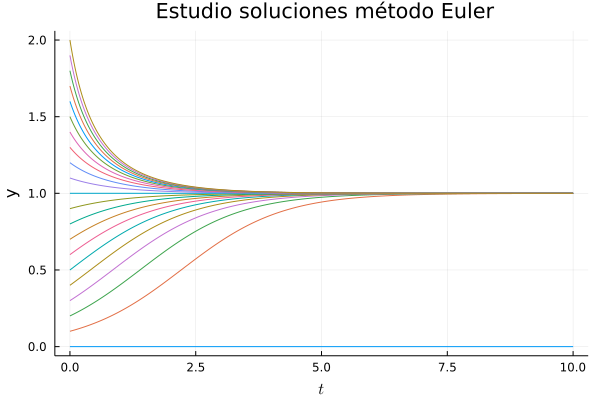

In [43]:
plt = plot()
plot!(ylabel = "\$y(t)\$", xlabel = "\$t\$", title =" Estudio soluciones método Euler")
plot!(plt, legend = false)
plot!(plt, ylabel = "y", color = :blue, zlabel = "z")
plot!(plt, t, sol[:,:])

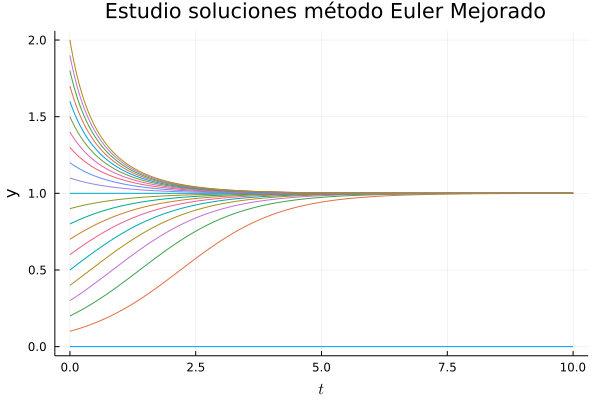

In [44]:
plt = plot()
plot!(ylabel = "\$y(t)\$", xlabel = "\$t\$", title =" Estudio soluciones método Euler Mejorado")
plot!(plt, legend = false)
plot!(plt, ylabel = "y", color = :blue, zlabel = "z")
plot!(plt, t, solEI[:,:])

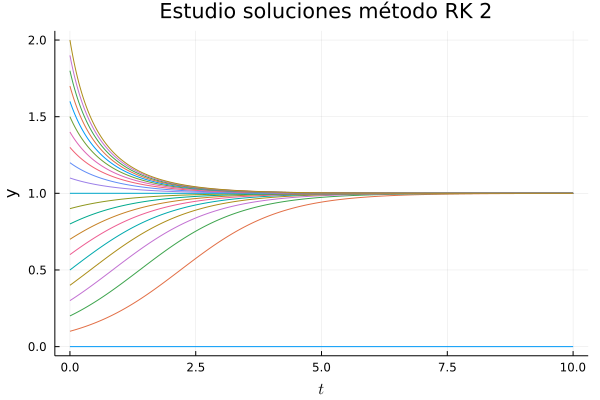

In [45]:
plt = plot()
plot!(ylabel = "\$y(t)\$", xlabel = "\$t\$", title =" Estudio soluciones método RK 2")
plot!(plt, legend = false)
plot!(plt, ylabel = "y", color = :blue, zlabel = "z")
plot!(plt, t, solRK2[:,:])

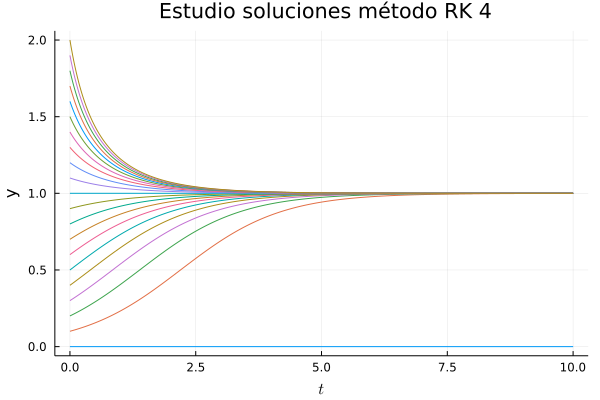

In [46]:
plt = plot()
plot!(ylabel = "\$y(t)\$", xlabel = "\$t\$", title =" Estudio soluciones método RK 4")
plot!(plt, legend = false)
plot!(plt, ylabel = "y", color = :blue, zlabel = "z")
plot!(plt, t, solRK4[:,:])

### Problema 3: ###
**Sistemas de ecuaciones**

La ecuación diferencial ordinaria de segundo orden
$$
\dfrac{d^{2}u(t)}{dt^2} = -\alpha^{2} u(t), \quad \alpha > 0
$$

tiene como solución general $u = A\textrm{cos}(\alpha t) +  B\textrm{sen}(\alpha t)$.

Para resolverla numéricamente, podemos convertirla en un sistema de ecuaciones se ordinarias de primer orden definiendo $v = \dfrac{du}{dt}$.

$$
    \begin{array}{c}
    \dfrac{du}{dt} &= &  v \\
    \dfrac{dv}{dt} &= &-\alpha^{2} u
    \end{array}
$$

***3a)*** Considere $$\alpha = 1, \quad u(0) = 1,\quad  v(0) = 0.$$ 
Grafique y compare el desempéño de los distintos métodos con la solución exacta.


*Pista: defina `y0 = [u0, v0]`*

In [47]:
#Datos iniciales
y0 = [1.;0.] 
α= 1.

1.0

In [48]:
#Definimos nuestra función 
function fp3(y, t,α)  
    u=y[1]
    v=y[2]
    return [ v; -α^2 *u ]      
end

T = (0.0, 10.0)
prob3 = myODEproblem(fp3, y0, T, α) 

(fp3, [1.0, 0.0], (0.0, 10.0), 1.0)

In [49]:
N = 401
dt = (T[2]-T[1])/(N-1)
t, y = myODEsolver(prob3, EulerStep, dt = dt) 
t, yEI = myODEsolver(prob3, EulerImproved, dt = dt) 
t, yRK2 = myODEsolver(prob3, RK2step, dt = dt) 
t, yRK4 = myODEsolver(prob3, RK4step, dt = dt) 

([0.0, 0.025, 0.05, 0.07500000000000001, 0.1, 0.125, 0.15000000000000002, 0.17500000000000002, 0.2, 0.225  …  9.775, 9.8, 9.825000000000001, 9.850000000000001, 9.875, 9.9, 9.925, 9.950000000000001, 9.975000000000001, 10.0], [1.0 0.0; 0.9996875162760417 -0.024997395833333335; … ; -0.8524084603727498 0.5228764819076471; -0.8390715462125327 0.5440210832130302])

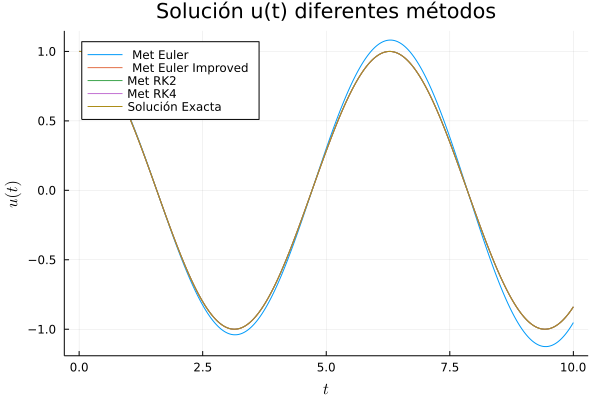

In [50]:
using Plots
gr()
plt = plot()
plot!(plt, t, y[:,1], label = " Met Euler", title = "Solución u(t) diferentes métodos")
plot!(plt, t, yEI[:,1], label = " Met Euler Improved")
plot!(plt, t, yRK2[:,1], label = "Met RK2")
plot!(plt, t, yRK4[:,1], label = "Met RK4")
plot!(plt, t, cos.(t), label = "Solución Exacta")
plot!(ylabel = "\$u(t)\$", xlabel = "\$t\$")
plot!(plt, legend = :topleft)

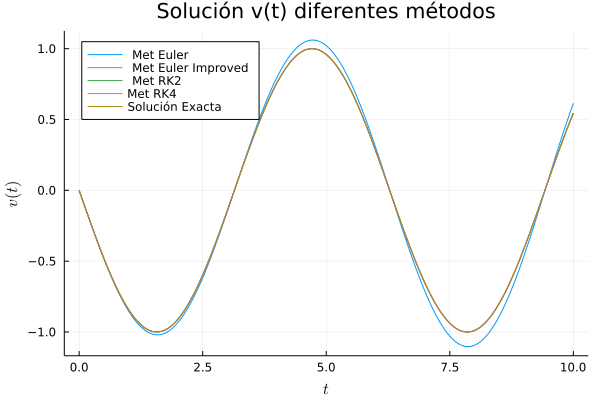

In [51]:
using Plots
gr()
plt = plot()
plot!(plt, t, y[:,2], label = " Met Euler", title = "Solución v(t) diferentes métodos")
plot!(plt, t, yEI[:,2], label = " Met Euler Improved")
plot!(plt, t, yRK2[:,2], label = " Met RK2")
plot!(plt, t, yRK4[:,2], label = "Met RK4")
plot!(plt, t, -sin.(t), label = "Solución Exacta")
plot!(ylabel = "\$v(t)\$", xlabel = "\$t\$")
plot!(plt, legend = :topleft)

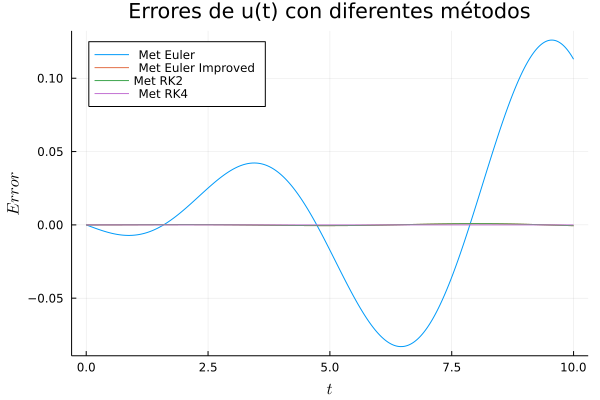

In [52]:
using Plots
gr()
plt = plot()
plot!(plt, t, cos.(t)-y[:,1], label = " Met Euler", title = "Errores de u(t) con diferentes métodos")
plot!(plt, t,cos.(t)- yEI[:,1], label = " Met Euler Improved")
plot!(plt, t, cos.(t)-yRK2[:,1], label = "Met RK2")
plot!(plt, t, cos.(t)-yRK4[:,1], label = " Met RK4")
plot!(ylabel = "\$Error\$", xlabel = "\$t\$")
plot!(plt, legend = :topleft)

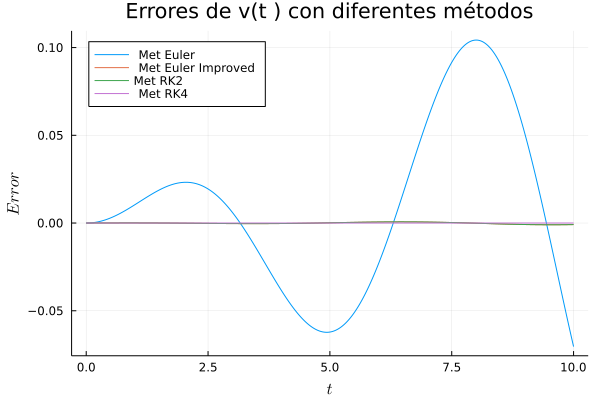

In [53]:
using Plots
gr()
plt = plot()
plot!(plt, t, -sin.(t)-y[:,2], label = " Met Euler", title = "Errores de v(t ) con diferentes métodos")
plot!(plt, t,-sin.(t)- yEI[:,2], label = " Met Euler Improved")
plot!(plt, t, -sin.(t)-yRK2[:,2], label = "Met RK2")
plot!(plt, t, -sin.(t)-yRK4[:,2], label = " Met RK4")
plot!(ylabel = "\$Error\$", xlabel = "\$t\$")
plot!(plt, legend = :topleft)

#3) Datos del problema: 
#Definimos el término derecho de la ODE
y0 = [1.;0.] #Datos iniciales
α= 1.

***3b)***

Resuelva ahora el sistema del péndulo físico: 

$$
\frac{d}{dt}\left(
    \begin{array}{c}
    y_1 \\
    y_2
    \end{array}
    \right)
    = 
    \left(
    \begin{array}{c}
    y_2 \\
    -sin(y_1)
    \end{array}
    \right)
$$

con con $y_0 = (0.1,0)$ en el intervalo $t=[0,10]$. 

Grafique las soluciones obtenidas. Use varios métodos y modifique el tamaño del paso temporal. Use otros datos iniciales. 

Vea que la función $E(y) = \frac{1}{2} y_2^2 + (1-cos(y_1))$ es constante a lo largo de la evolución (una *constante del movimiento*) y vea que sucede numericamente. 

In [54]:
#Datos iniciales
y0 = [0.1;0.] 


2-element Vector{Float64}:
 0.1
 0.0

In [55]:
function fpend(y, t,α)  
    y1=y[1]
    y2=y[2]
    return [ y2; -sin(y1) ]      
end

T = (0.0, 10.0) 
prob3b = myODEproblem(fpend, y0, T, α ) 

(fpend, [0.1, 0.0], (0.0, 10.0), 1.0)

In [56]:
N = 401 #
dt = (T[2]-T[1])/(N-1)
t, yb = myODEsolver(prob3b, EulerStep, dt = dt)
t, yEIb = myODEsolver(prob3b, EulerImproved, dt = dt) 
t, yRK2b = myODEsolver(prob3b, RK2step, dt = dt) 
t, yRK4b = myODEsolver(prob3b, RK4step, dt = dt) 

([0.0, 0.025, 0.05, 0.07500000000000001, 0.1, 0.125, 0.15000000000000002, 0.17500000000000002, 0.2, 0.225  …  9.775, 9.8, 9.825000000000001, 9.850000000000001, 9.875, 9.9, 9.925, 9.950000000000001, 9.975000000000001, 10.0], [0.1 0.0; 0.09996880367407429 -0.0024955767318426045; … ; -0.08556992841678447 0.051709995074917976; -0.08425060611720737 0.05383031179291847])

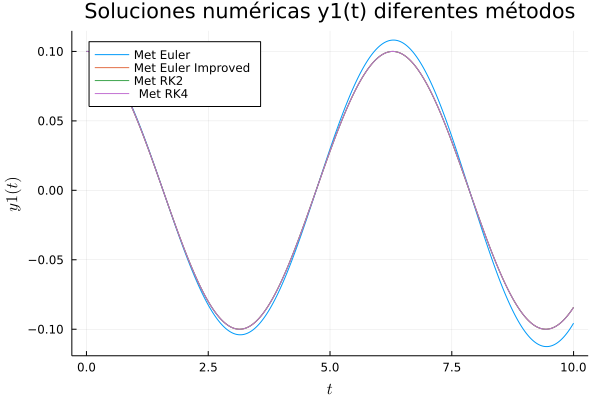

In [57]:
using Plots
gr()
plt = plot()
plot!(plt, t, yb[:,1], label = "Met Euler", title = "Soluciones numéricas y1(t) diferentes métodos")
plot!(plt, t, yEIb[:,1], label = "Met Euler Improved")
plot!(plt, t, yRK2b[:,1], label = "Met RK2")
plot!(plt, t, yRK4b[:,1], label = " Met RK4")
plot!(ylabel = "\$y1(t)\$", xlabel = "\$t\$")
plot!(plt, legend = :topleft)

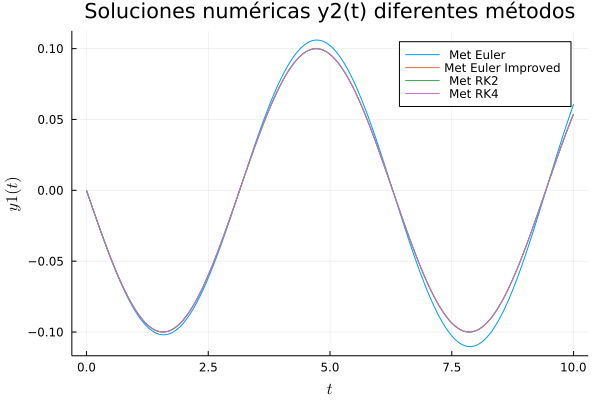

In [58]:
using Plots
gr()
plt = plot()
plot!(plt, t, yb[:,2], label = " Met Euler", title = "Soluciones numéricas y2(t) diferentes métodos")
plot!(plt, t, yEIb[:,2], label = "Met Euler Improved")
plot!(plt, t, yRK2b[:,2], label = " Met RK2")
plot!(plt, t, yRK4b[:,2], label = " Met RK4")
plot!(ylabel = "\$y1(t)\$", xlabel = "\$t\$")
plot!(plt, legend = :topright)

In [59]:
#vemos que pasa con la constante de movimiento
function ctemovb(y ) 
    y1=y[:,1]
    y2=y[:,2]
    return 0.5* y2 .^ 2+ (1. .- cos.(y1))      
end
 

ctemovb (generic function with 1 method)

In [60]:
ctemovb(yRK4b)

401-element Vector{Float64}:
 0.0049958347219741794
 0.004995834721957328
 0.00499583472194024
 0.004995834721922905
 0.004995834721905315
 0.004995834721887498
 0.004995834721869445
 0.004995834721851234
 0.0049958347218327535
 0.004995834721814106
 0.004995834721795406
 0.0049958347217764895
 0.004995834721757447
 ⋮
 0.00499583471539795
 0.004995834715378825
 0.004995834715359738
 0.004995834715340664
 0.004995834715321485
 0.004995834715302376
 0.004995834715283218
 0.004995834715264312
 0.0049958347152454004
 0.0049958347152266325
 0.004995834715208002
 0.004995834715189612

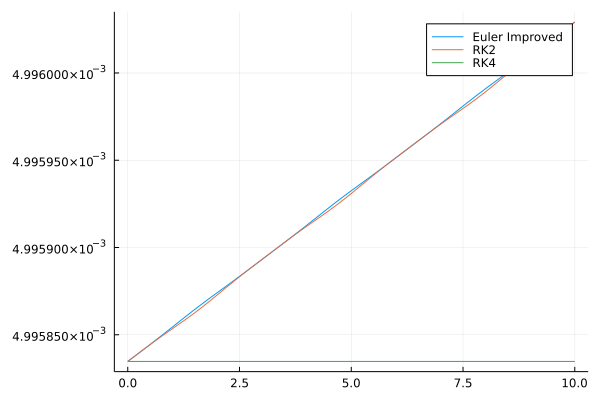

In [61]:
#plot(t,ctemovb(yb), label =" Euler", Title ="Cte de Mov distintos métodos" )
plot(t,ctemovb(yEIb), label =" Euler Improved" )
plot!(t,ctemovb(yRK2b), label =" RK2" )
plot!(t,ctemovb(yRK4b), label =" RK4" )

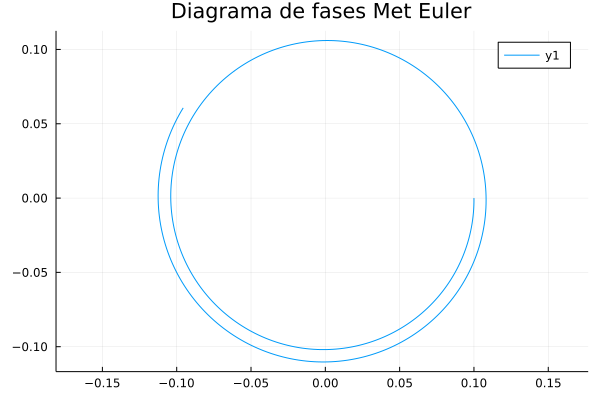

In [62]:
#Con el siguiente grafico tambien se puede observar el error del metodo de Euler
plot(yb[:,1],yb[:,2],aspect_ratio=1, title="Diagrama de fases Met Euler")

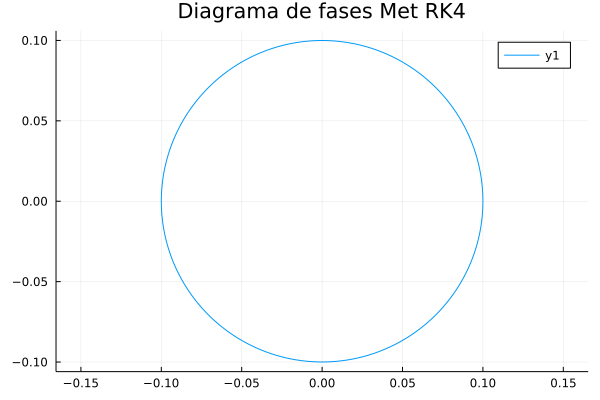

In [63]:
#Vemos como en este caso si se cierra
plot(yRK4b[:,1],yRK4b[:,2],aspect_ratio=1, title="Diagrama de fases Met RK4")